In [2]:
import numpy as np
import statistics as stat
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sc
import statsmodels.api as sm
import math
from IPython.display import Image

# Выборка

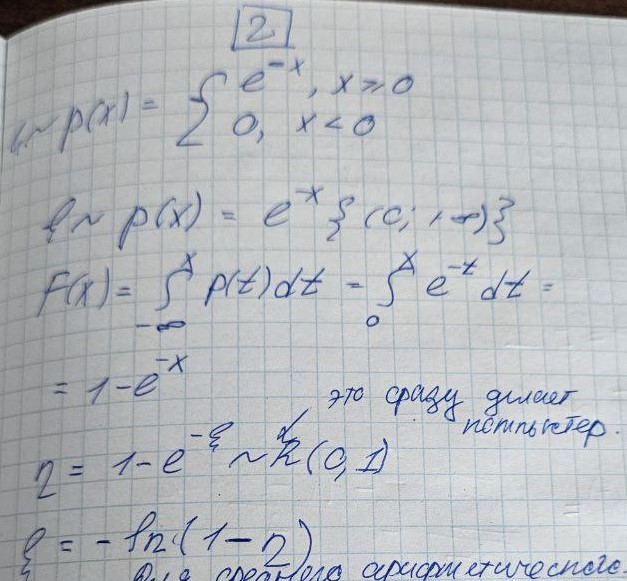

In [6]:
Image("ph1.jpg", width=640, height=480) 

In [7]:
random_array = np.random.rand(25)
ksi = -np.log(1 - random_array)
ksi = sorted(ksi)
print(ksi, sep = '\n') 

[0.032025561628685285, 0.08151492447699875, 0.16856083176619163, 0.2076960376652469, 0.21304057850098104, 0.36707993060246635, 0.396185023898378, 0.4133417249583472, 0.46345572069318625, 0.6727278946153781, 0.6807090291117633, 0.7012192775016298, 0.7052456330334179, 0.9508143441562166, 1.042147043717578, 1.1357957259340603, 1.30656811167147, 1.3560189908238962, 2.121922882953508, 2.98974736417274, 3.0088993374437965, 3.019433909211785, 3.2048700609734952, 3.6902897143731974, 5.011025415073779]


# Параметры выборки

In [8]:
mode = stat.mode(ksi)
median = stat.median(ksi)
def delta(sample):
    return max(sample) - min(sample)
def quartiles(sample):
    size = len(sample)
    if size % 2 == 0:
        return a[size / 4 + 1], a[3 / 4 * size + 1]
    else:
        return 
median2 = np.median(ksi)

print('Параметры выборки:')
print('Мода - все числа')
median = stat.median(ksi)
print('Медиана: ', median)
print('Размах: ', delta(ksi))
print('Оценка коэффициента асимметрии: ', sc.skew(ksi))

Параметры выборки:
Мода - все числа
Медиана:  0.7052456330334179
Размах:  4.978999853445094
Оценка коэффициента асимметрии:  1.159194926532515


# Эмпирическая функция распределения

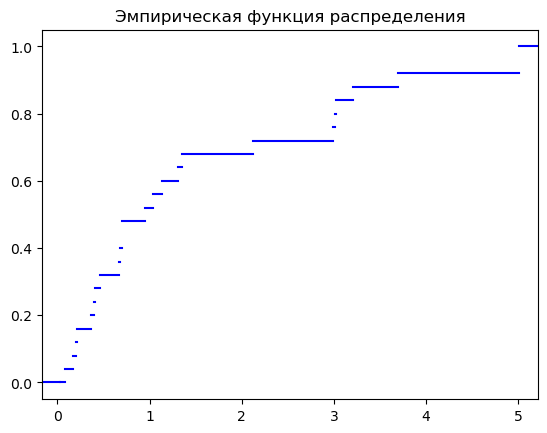

In [9]:
def plot_empirical_cdf(sample):
    plt.plot([min(sample) - 0.2, min(sample)], [0, 0], c = "blue")
    plt.plot([max(sample), max(sample) + 0.2], [1, 1], c = "blue")
    for i in range(len(sample) - 1):
        plt.plot([sample[i], sample[i + 1]],[1/25 * i, 1/25 * i], c="blue")
    plt.xlim(min(sample) - 0.2, max(sample) + 0.2)
    plt.title('Эмпирическая функция распределения')
    plt.show()
plot_empirical_cdf(ksi)


# Гистограмма

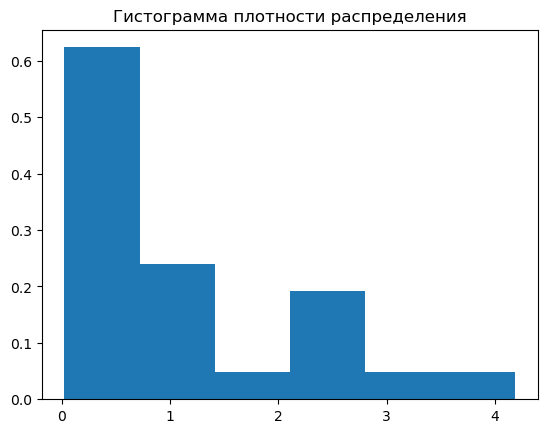

In [10]:
def find_number(start, finish, sample):
    counter = 0
    for i in range(len(sample)):
        if sample[i] >= start and sample[i] < finish:
            counter += 1
    return counter

def plot_hist(sample):
    N_intervals = 6
    interval_range = 0
    test = []
    to_build = []
    plt.title('Гистограмма плотности распределения')        
    interval_range = (delta(sample) + 0.02) / N_intervals
    for i in range(N_intervals):
        test.append(find_number(min(sample) - 0.01 + i * interval_range, min(sample) - 0.01 + (i + 1) * interval_range, sample) / len(sample) / interval_range)
        to_build.append(min(sample) - 0.01 + i * interval_range)
    plt.hist(to_build, bins = int(N_intervals), weights = test)

plot_hist(ksi)

# Boxplot (+1.5 Epsilon)

[Text(0.5, 1.0, 'Boxplot')]

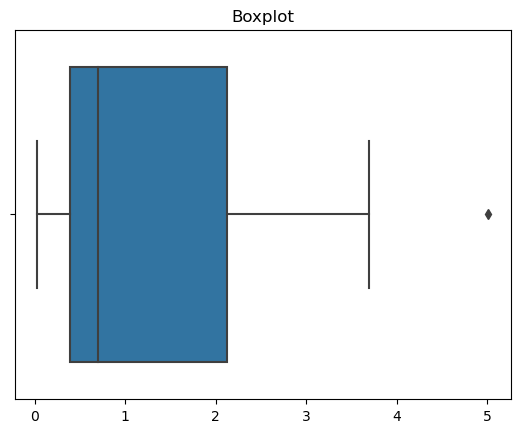

In [11]:
sns.boxplot(x = ksi).set(title = "Boxplot")

# Бутстраповские выборки

### Генерация 1000 выборок:

In [12]:
def get_bootstrap_sample(x, B_sample = 1000):
    N = len(x)
    sample = np.random.choice(x, size = (N, B_sample), replace = True)
    if (B_sample == 1):
        sample = sample.T[0]
    return sample
x_boot = get_bootstrap_sample(ksi)
x_boot_mean = np.mean(x_boot, axis = 0)
x_boot_median = np.median(x_boot, axis = 0)
x_boot_asymmetry = sc.skew(x_boot, axis = 0)

# Плотность распределения среднего арифметического элементов выборки

## Сама плотность

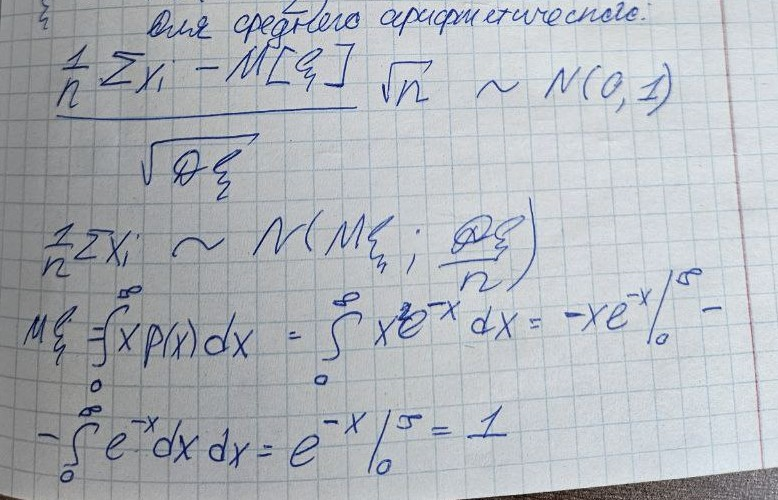

In [13]:
Image("ph5.jpg", width=640, height=480) 


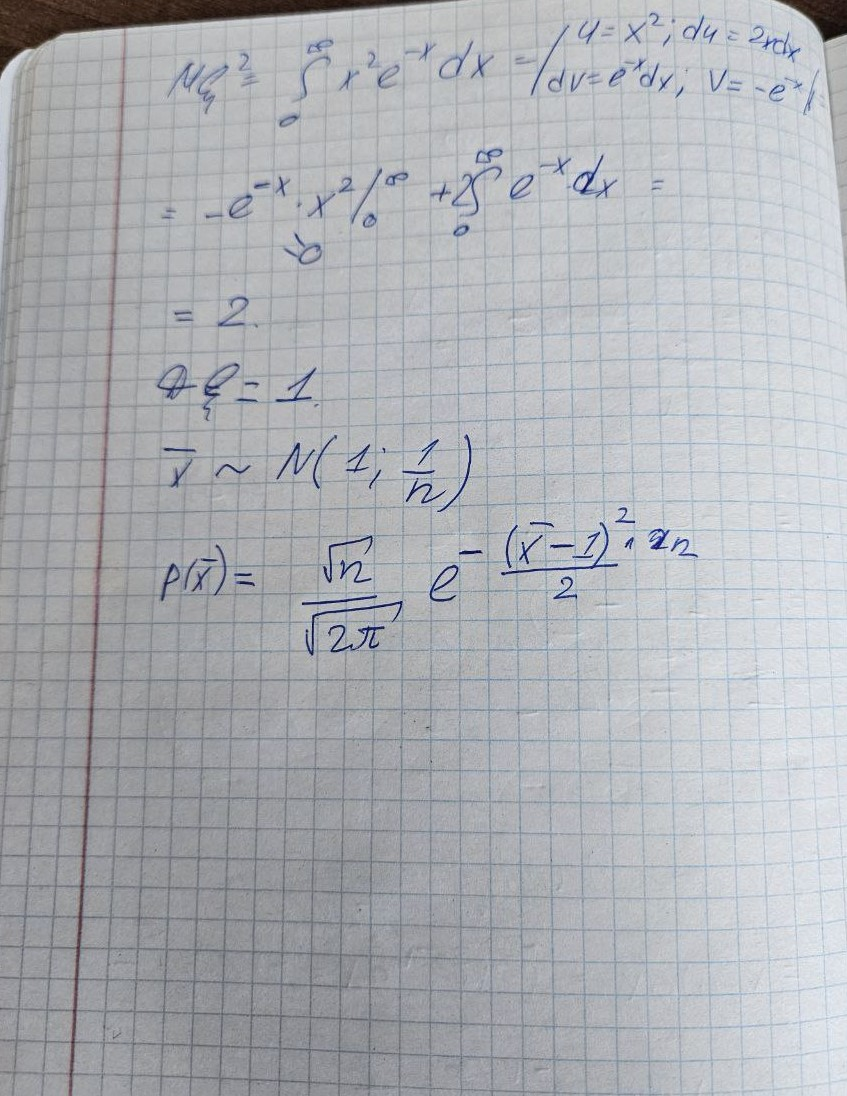

In [14]:
Image("ph2.jpg", width=640, height=480) 

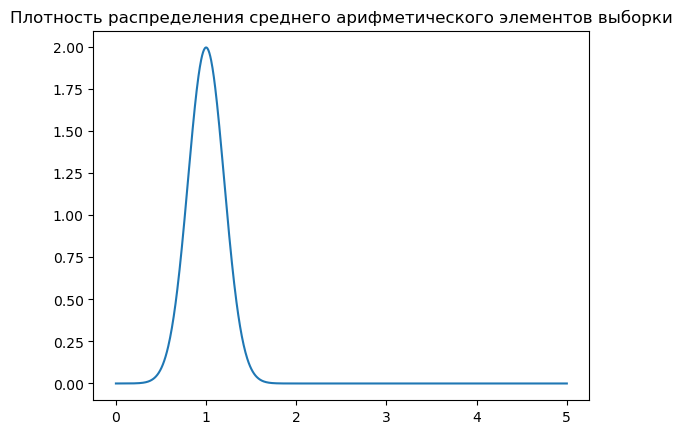

In [15]:
x = np.linspace(0, 5, 1000)
y = 5 / ((2 * np.pi) ** 0.5) * np.e ** (-12.5 * (x - 1) ** 2)
plt.title('Плотность распределения среднего арифметического элементов выборки')
plt.plot(x, y)

## Бутстраповская оценка

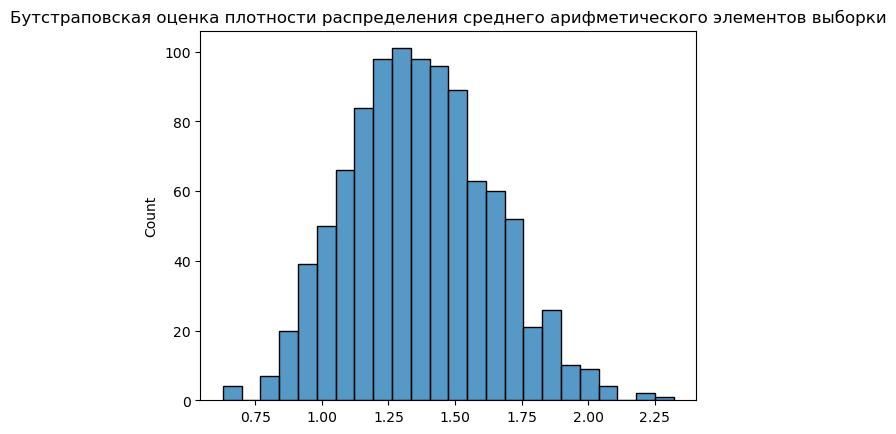

In [16]:
sns_plot = sns.histplot(x_boot_mean).set(title = "Бутстраповская оценка плотности распределения среднего арифметического элементов выборки")

# Бутстрапоская оценка плотности распределения коэффициента асимметрии

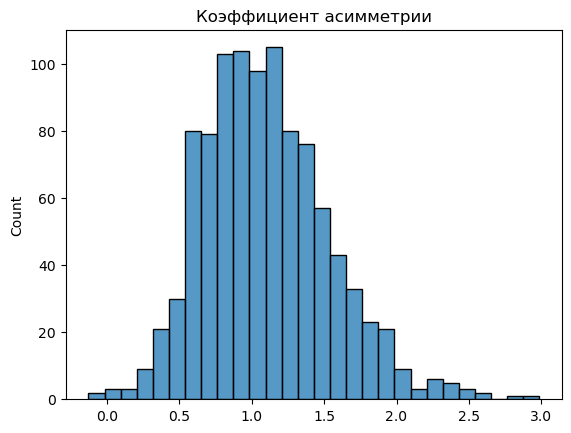

In [17]:
sns_plot = sns.histplot(x_boot_asymmetry).set(title = 'Коэффициент асимметрии')

# Плотность распределения медиан

## Сама плотность

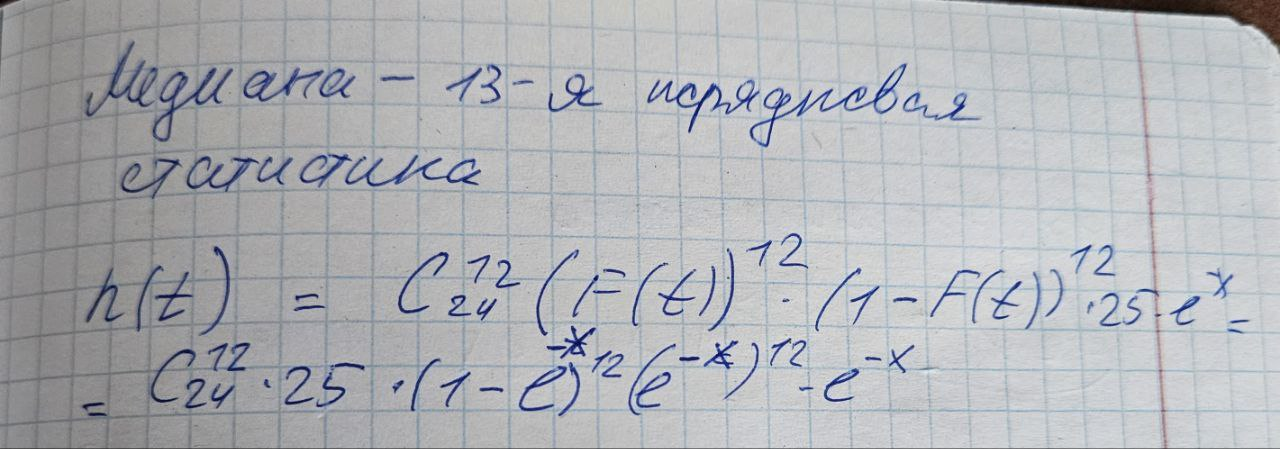

In [18]:
Image("median.jpg", width=640, height=480) 

Text(0.5, 1.0, 'Плотность распределения медиан')

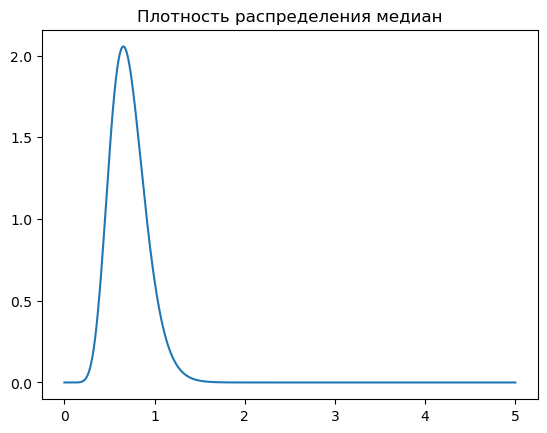

In [15]:
x = np.linspace(0, 5, 1000)
median = math.comb(24, 12) * 25 * (1 - np.e ** (-x)) ** 12 * (np.e ** (-x)) ** 12 * np.e ** (-x)
plt.plot(x, median)
plt.title('Плотность распределения медиан')

## Бутстраповская оценка 

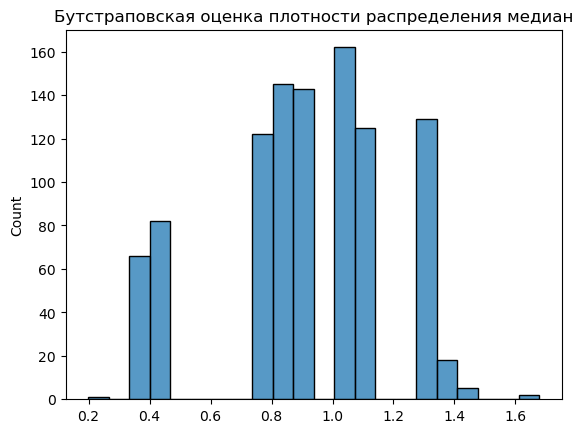

In [59]:
sns_plot = sns.histplot(x_boot_median).set(title = 'Бутстраповская оценка плотности распределения медиан')